# 📘 Impedance and Phase Plot from DATS Export

This notebook reads a text file exported from the Dayton Audio Test System (DATS) and plots impedance and phase versus frequency. 
The impedance is plotted on the left Y-axis, and the phase (dotted line) is plotted on the right Y-axis.

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import scienceplots

In [2]:
# Define the file path
file_path = 'hapticoupler_transducer.txt'

# Prepare lists for frequency, impedance, and phase
frequencies = []
impedances = []
phases = []

# Flag to detect the start of data section
data_section = False

# Read and parse the data
with open(file_path, 'r') as file:
    for line in file:
        if line.strip().startswith("Freq"):
            data_section = True
            continue
        if data_section:
            try:
                parts = line.strip().split()
                if len(parts) >= 3:
                    frequencies.append(float(parts[0]))
                    impedances.append(float(parts[1]))
                    phases.append(float(parts[2]))
            except ValueError:
                continue  # Skip lines that don't convert cleanly

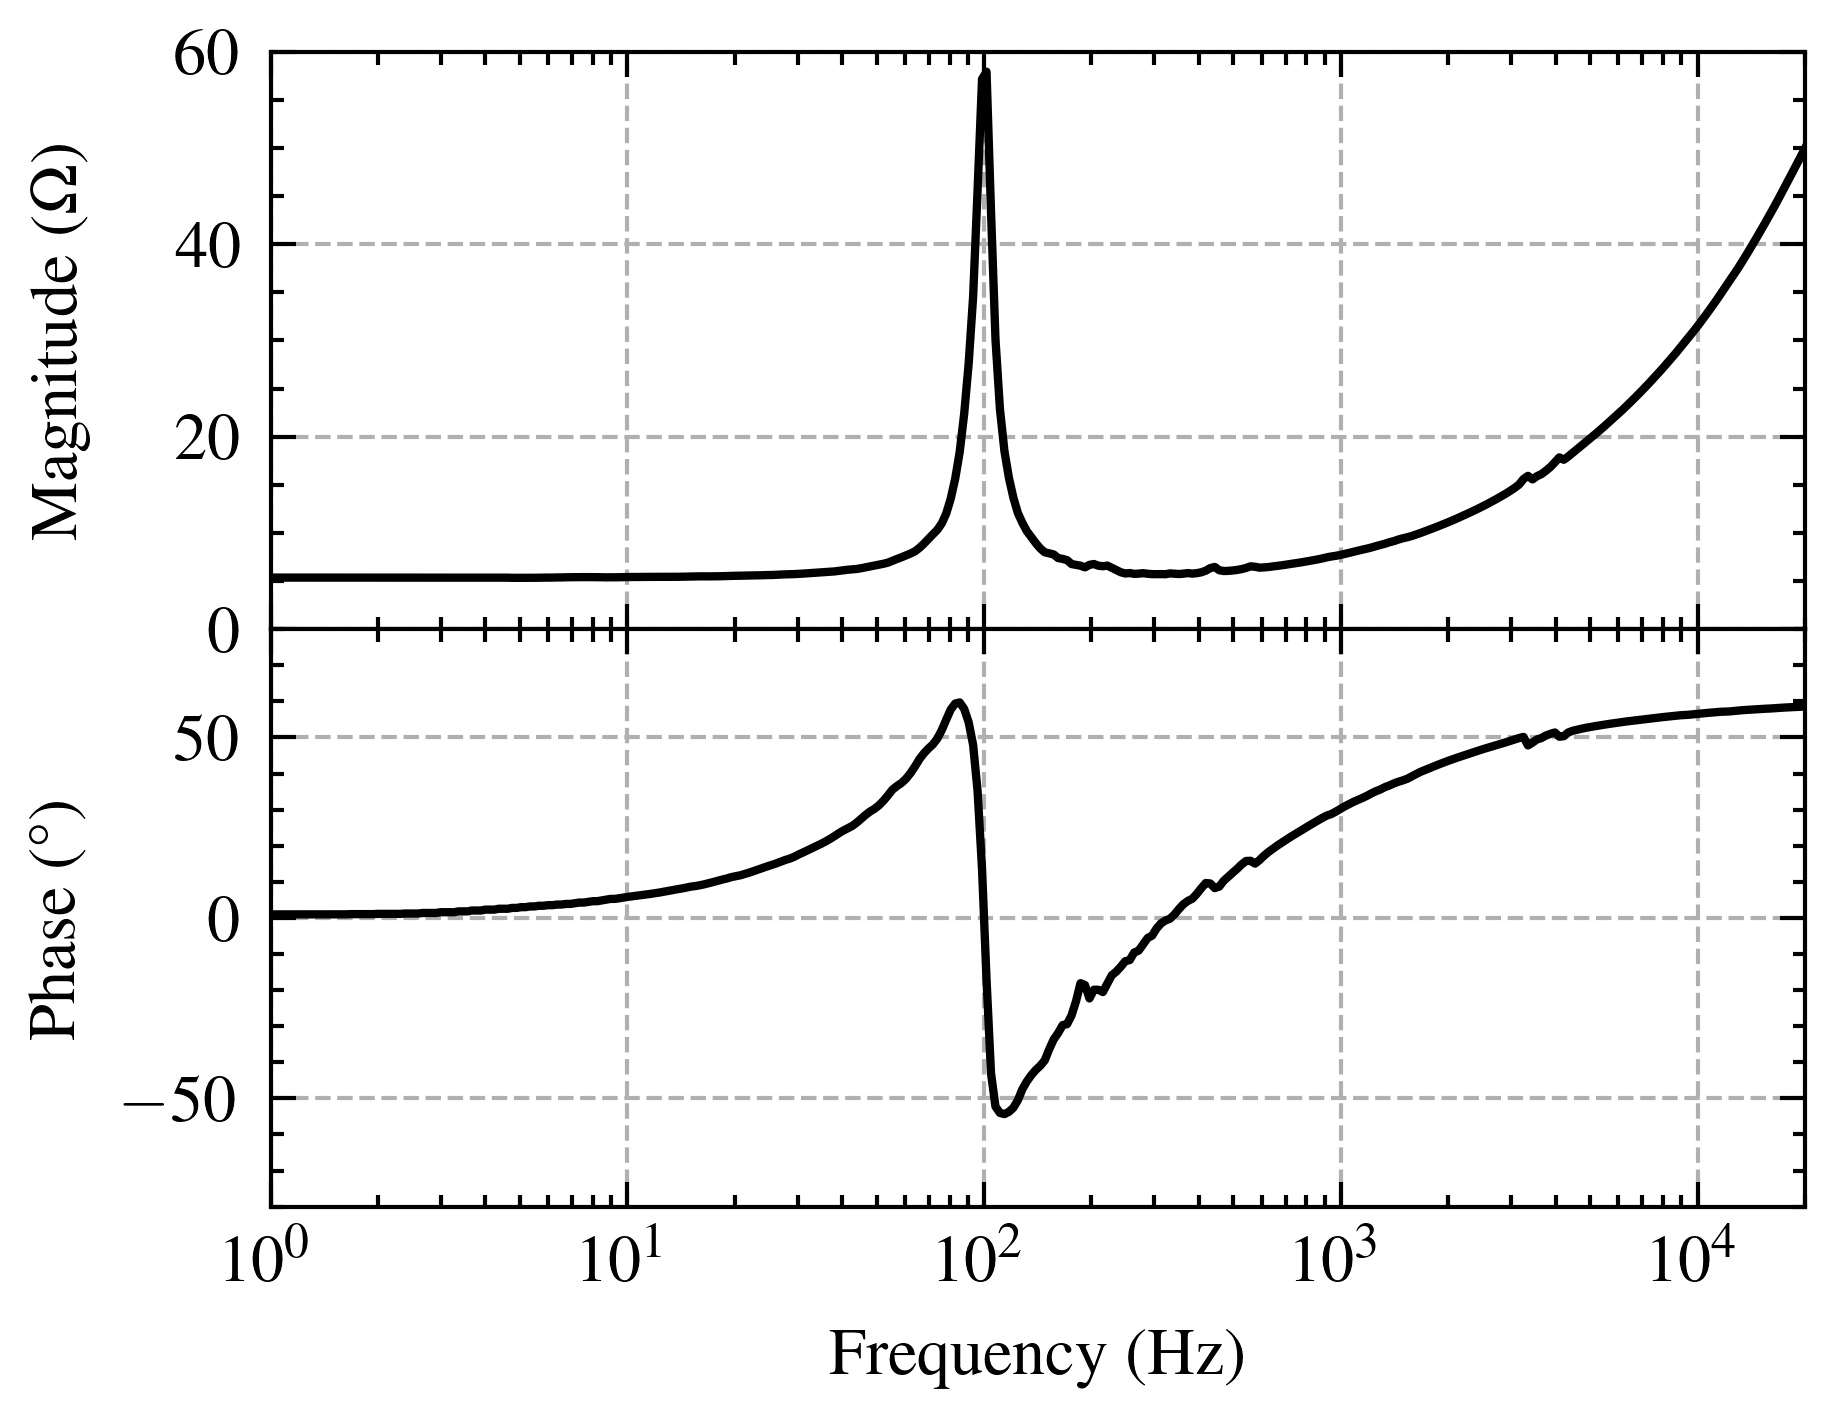

In [36]:
import matplotlib as mpl
from matplotlib import gridspec

#set Times New Roman as the default font
#mpl.rcParams['font.family'] = 'Times New Roman'

# Create figure and axis
fig = plt.figure()

gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 

ax1 = plt.subplot(gs[0])


# Plot impedance

ax1.set_ylabel('Magnitude ($\Omega$)')
ax1.set_xscale('log')  # Set x-axis to logarithmic scale
ax1.plot(frequencies, impedances, label='Impedance')
#ax1.tick_params(axis='y', labelcolor='tab:blue')
#ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
ax1.set_ylim([0,60])
ax1.set_xlim([1,20000])

plt.grid(True, which='major',axis='both', linestyle='--', linewidth=0.5)


# Plot phase on secondary axis
ax2 = plt.subplot(gs[1], sharex = ax1)
#ax2 = ax1.twinx()
ax2.set_ylabel('Phase (°)')
ax2.plot(frequencies, phases,label='Phase')  # Dotted red line
#ax2.tick_params(axis='y', labelcolor='tab:red')
#ax2.yaxis.set_major_locator(plt.MaxNLocator(4))
phase_range = 80
ax2.set_ylim([-phase_range,phase_range])
ax2.set_xlabel('Frequency (Hz)')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)

plt.grid(True, which='major',axis='both', linestyle='--', linewidth=0.5)

# Add grid and title
#plt.title('Impedance and Phase vs Frequency')
#fig.tight_layout()

plt.style.use(['science','ieee'])

fig.align_ylabels()

# Save the figure as EPS
plt.savefig('outputs/impedance_phase_plot_ieee.eps', format='eps')

plt.show()